In [241]:
#Analysis I: Borough and Room Type Analysis

In [242]:
#Import libraries used for data exploration, visualization, and analysis of the listings dataset.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import plotly.graph_objects as go

In [243]:
#Data Exploration

In [244]:
#Using pandas library and 'read_csv' function to read listingscsv.csv file into Python.
airbnb = pd.read_csv('listingscsv.csv')

In [245]:
#Displays the first 5 rows from the listings dataset with all variables as example.
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


In [246]:
#Displays the number of observations from the listings dataset.
len(airbnb)

48864

In [247]:
#Displays all the columns(variables) from the listings dataset.
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [248]:
airbnb.shape

(48864, 16)

In [249]:
#prints the number of variables and observations of the listings dataset.
print('Number of variables: {}'.format(airbnb.shape[1]))
print('Number of observations: {}'.format(airbnb.shape[0]))

Number of variables: 16
Number of observations: 48864


In [250]:
#shows the datatype of the variables.
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [251]:
#Data Cleaning

In [252]:
#Checking which variable contains null or missing values.
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            18
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10131
reviews_per_month                 10131
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [253]:
#Dropping variables for future data exploration and analysis.
airbnb.drop(['host_name','last_review'], axis=1, inplace=True)

In [254]:
#Checking variables after dropping.
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10131
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [255]:
#Replacing null or missing values from 'reviews_per_month' with 0.
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [256]:
#Checking variables after dropping, replacement1.
airbnb.isnull().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [257]:
#Replacing null or missing values from 'name' with 'No name'.
airbnb.fillna({'name':'No name'}, inplace=True)

In [258]:
#Checking variables after dropping, replacement1, replacement2.
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [259]:
#Displays the first 15 rows from the listings dataset with all variables after cleaning as example.
airbnb.head(15)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,0.60,1,127
5,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.39,1,0
6,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,3.48,1,239
7,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.98,1,0
8,5222,Best Hideaway,7516,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,30,94,0.74,1,322
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,1.33,4,0


In [260]:
#Identifying Unique Data 

In [261]:
#EXTRA
#Display the top 5 hosts with most listings.
top5_host = airbnb.host_id.value_counts().head(5)
top5_host

219517861    343
107434423    239
30283594     119
137358866    117
12243051      96
Name: host_id, dtype: int64

In [262]:
#EXTRA
#Display the top 5 neighbourhoods with most listings.
top5_neighbourhood = airbnb.neighbourhood.value_counts().head(5)
top5_neighbourhood

Williamsburg          3915
Bedford-Stuyvesant    3767
Harlem                2641
Bushwick              2436
Hell's Kitchen        1947
Name: neighbourhood, dtype: int64

In [263]:
#Display the total count of the neighbourhood_group.
airbnb.neighbourhood_group.value_counts()

Manhattan        21456
Brooklyn         20114
Queens            5811
Bronx             1105
Staten Island      378
Name: neighbourhood_group, dtype: int64

In [264]:
#Display the total count of the room type.
airbnb.room_type.value_counts()

Entire home/apt    25296
Private room       22397
Shared room         1171
Name: room_type, dtype: int64

In [265]:
#Data Analysis

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051')]

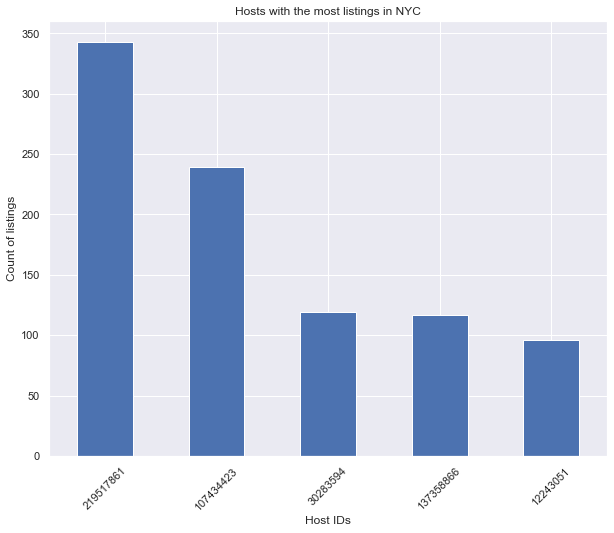

In [266]:
#EXTRA
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
bar1=top5_host.plot(kind='bar')
bar1.set_title('Hosts with the most listings in NYC')
bar1.set_ylabel('Count of listings')
bar1.set_xlabel('Host IDs')
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45)

[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, "Hell's Kitchen")]

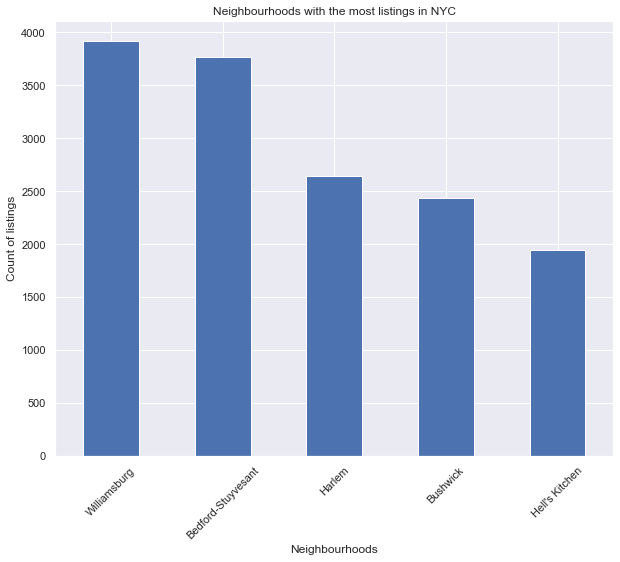

In [267]:
#EXTRA
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
bar2=top5_neighbourhood.plot(kind='bar')
bar2.set_title('Neighbourhoods with the most listings in NYC')
bar2.set_ylabel('Count of listings')
bar2.set_xlabel('Neighbourhoods')
bar2.set_xticklabels(bar2.get_xticklabels(), rotation=45)

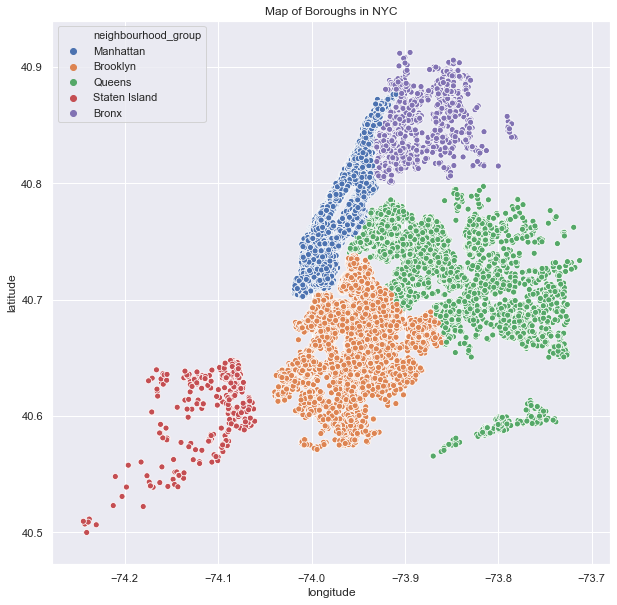

In [268]:
#Using seaborn and matplotlib library to show the Map of the listings dataset
#Using the 'latitude', 'longitude', and 'neighbourhood_group' variables.
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue=airbnb.neighbourhood_group)

plt.title("Map of Boroughs in NYC")
plt.ioff()

Text(0.5, 0, 'Boroughs')

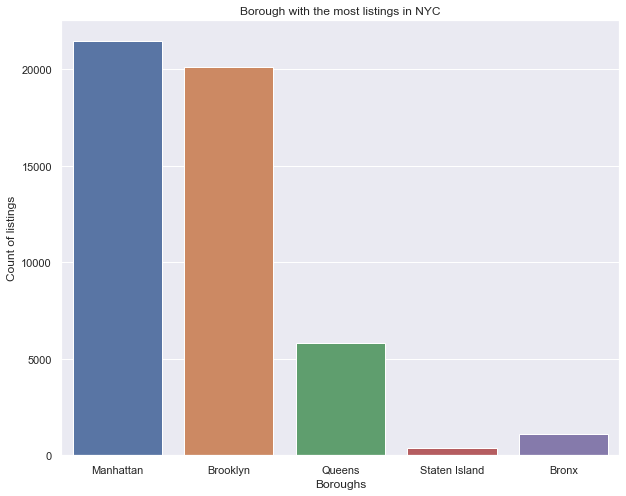

In [269]:
plt.figure(figsize=(10,8))
bar3 = sns.countplot(airbnb["neighbourhood_group"])
bar3.set_title('Borough with the most listings in NYC')
bar3.set_ylabel('Count of listings')
bar3.set_xlabel('Boroughs')

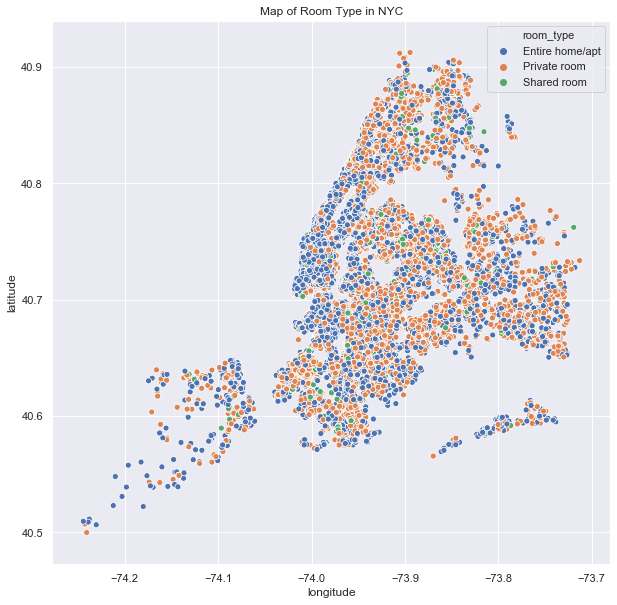

In [270]:
#map of room_type
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb.longitude, airbnb.latitude, hue=airbnb.room_type)

plt.title("Map of Room Type in NYC")
plt.ioff()

In [271]:
#pie chart of room type
roomchart = airbnb.groupby('room_type').size()
labels = roomchart.index
values = roomchart.values

#use hole to create a donut-like pie chart
piechart = go.Figure(data=[go.Pie(labels=roomchart.index, values=roomchart.values, hole=.3)])
piechart.show()

Text(0.5, 0, 'Boroughs by Room Type')

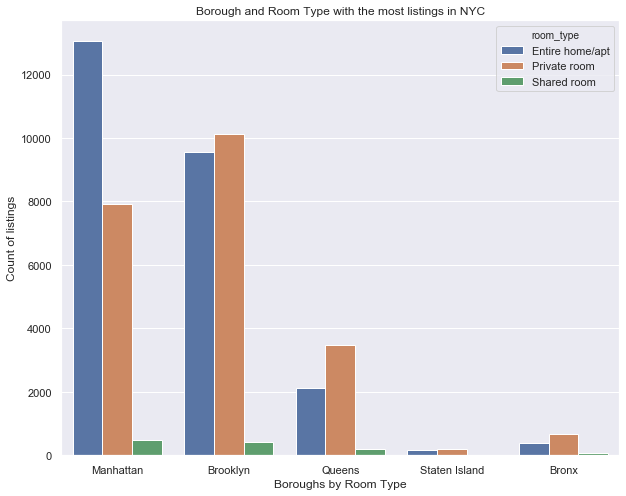

In [272]:
plt.figure(figsize=(10,8))
bar4 = sns.countplot(airbnb["neighbourhood_group"], hue=airbnb['room_type'])
bar4.set_title('Borough and Room Type with the most listings in NYC')
bar4.set_ylabel('Count of listings')
bar4.set_xlabel('Boroughs by Room Type')

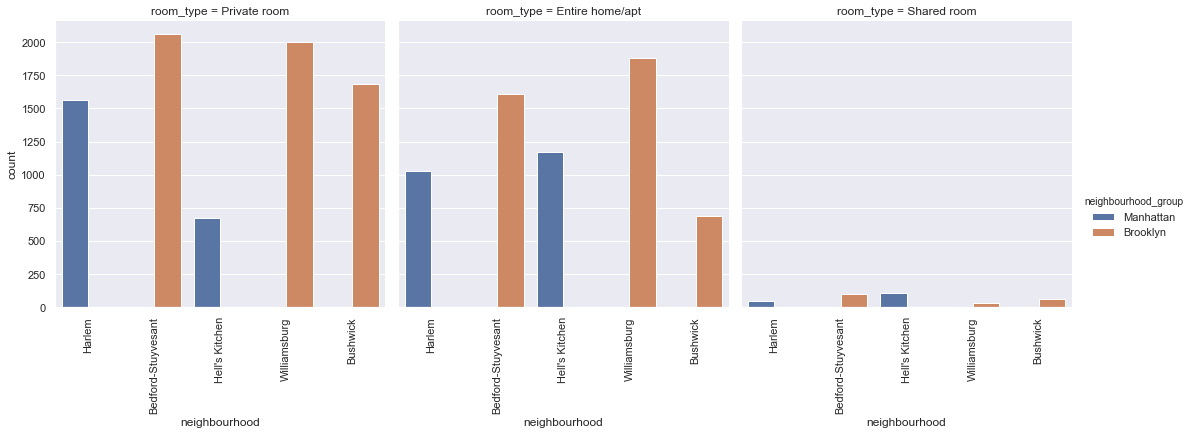

In [273]:
#grabbing top 5 neighbourhoods for sub-dataframe
sub_1=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Hell\'s Kitchen'])]
#using catplot to represent multiple interesting attributes together and a count
bar5=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_1, kind='count')
bar5.set_xticklabels(rotation=90)

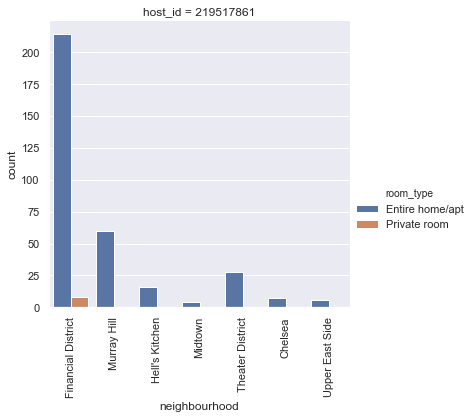

In [274]:
#grabbing top host for sub-dataframe
sub_2=airbnb.loc[airbnb['host_id'].isin([219517861])]
#using catplot to represent multiple interesting attributes together and a count
bar6=sns.catplot(x='neighbourhood', hue='room_type', col='host_id', data=sub_2, kind='count')
bar6.set_xticklabels(rotation=90)

In [275]:
#The stats of price 
airbnb['price'].describe()

count    48864.000000
mean       151.453176
std        236.585525
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

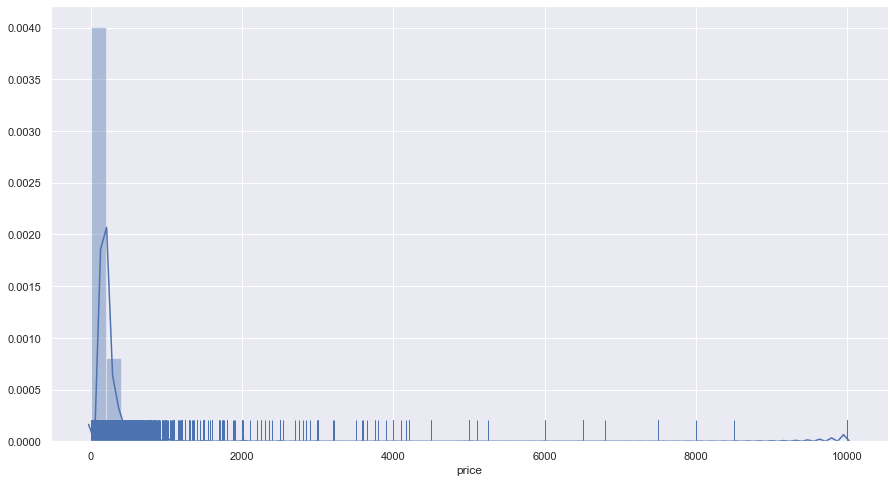

In [276]:
#price distribution plot
plt.figure(figsize=(15,8))
sns.distplot(airbnb['price'], rug=True)

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

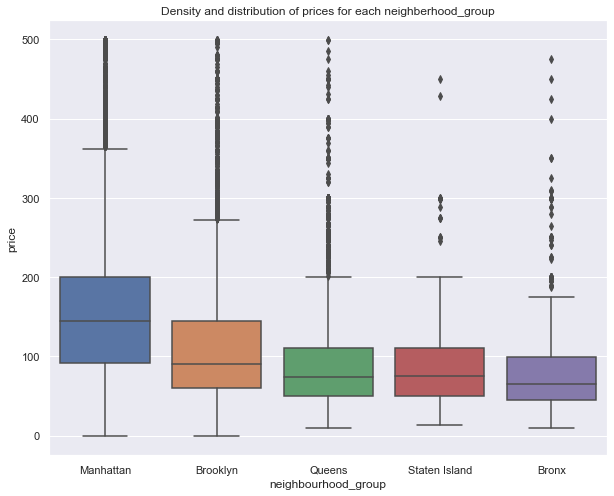

In [277]:
#box plot for boroughs and price
sub_3 = airbnb[airbnb.price < 500]

plot1 = sns.boxplot(data=sub_3, x='neighbourhood_group', y='price')
plot1.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of prices for each room type')

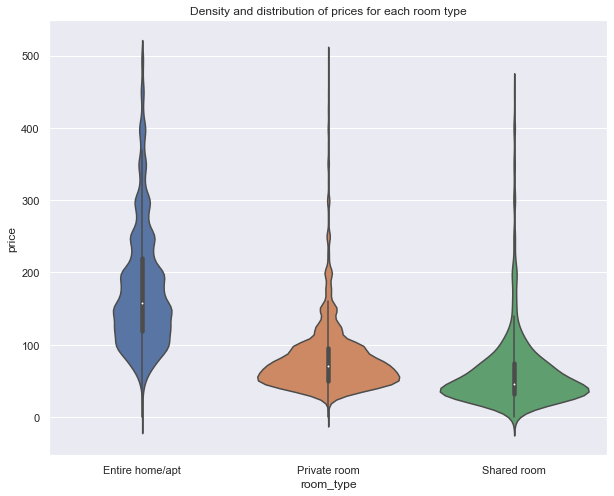

In [278]:
#violin plot of room type and price
sub_4 = airbnb[airbnb.price < 500]

plot2 = sns.violinplot(data=sub_4, x='room_type', y='price')
plot2.set_title('Density and distribution of prices for each room type')

<Figure size 720x432 with 0 Axes>

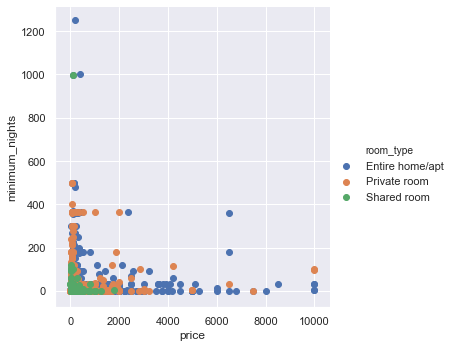

In [279]:
#scatterplot of room type, price, and minimum nights 
plt.figure(figsize=(10,6))
sns.FacetGrid(airbnb,hue='room_type',height=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.ioff()
plt.show()

In [280]:
# Get the average price and number of reviews per room type
private_roomtype = airbnb.loc[airbnb['room_type'] == 'Private room']
entire_apt_roomtype = airbnb.loc[airbnb['room_type'] == 'Entire home/apt']
shared_roomtype = airbnb.loc[airbnb['room_type'] == 'Shared room']

print('Private Room Stats')
private_roomtype[['price', 'number_of_reviews']].describe()

Private Room Stats


,price,number_of_reviews
count,22397.000000,22397.000000
mean,90.116533,24.306023
std,166.430653,47.848209
min,0.000000,0.000000
25%,50.000000,1.000000
50%,70.000000,5.000000
75%,95.000000,25.000000
max,10000.000000,639.000000


In [281]:
print('Entire Home/Apt Room Stats')
entire_apt_roomtype[['price', 'number_of_reviews']].describe()

Entire Home/Apt Room Stats


,price,number_of_reviews
count,25296.000000,25296.000000
mean,209.486322,22.887453
std,275.823900,42.605715
min,0.000000,0.000000
25%,120.000000,1.000000
50%,160.000000,6.000000
75%,229.000000,23.000000
max,10000.000000,498.000000


In [282]:
print('Private Room Stats')
shared_roomtype[['price', 'number_of_reviews']].describe()

Private Room Stats


,price,number_of_reviews
count,1171.000000,1171.000000
mean,70.966695,16.817250
std,106.175873,34.783099
min,0.000000,0.000000
25%,32.000000,0.000000
50%,45.000000,4.000000
75%,75.000000,17.000000
max,1800.000000,461.000000


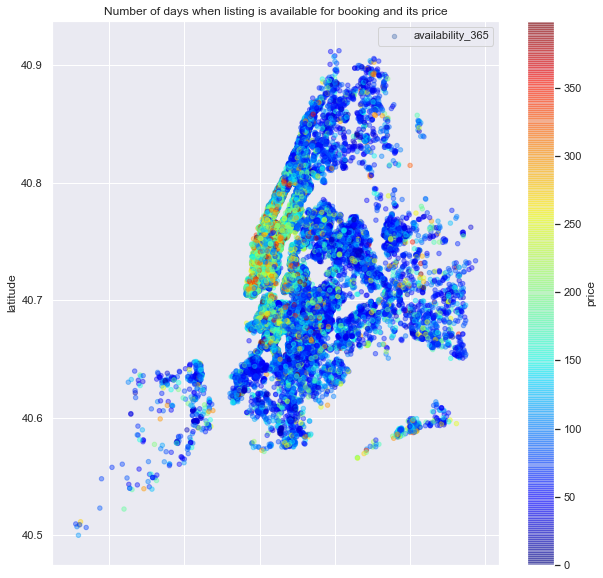

In [283]:
#scatter plot as map
#Using the 'latitude', 'longitude', 'price', and 'availability_365' variables.
sub_5 = airbnb[airbnb.price < 400]

map2 = sub_5.plot(figsize=(10,10), kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)

plt.title("Number of days when listing is available for booking and its price")
map2.legend()

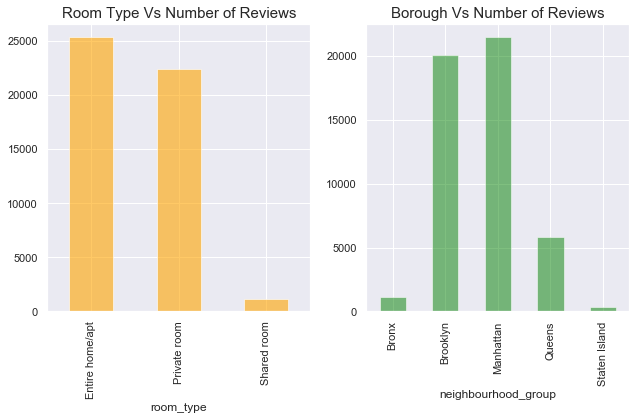

In [284]:
#Distribution of reviews among available room types and neighborhood groups
plt.figure(figsize=(9, 6))
plt.subplot(1,2,1)
airbnb.groupby(['room_type']).count()['number_of_reviews'].plot(kind='bar',alpha = 0.6,color = 'orange')
plt.title('Room Type Vs Number of Reviews',fontsize=15)

plt.subplot(1,2,2)
airbnb.groupby(['neighbourhood_group']).count()['number_of_reviews'].plot(kind='bar',color='green',alpha=0.5)
plt.title('Borough Vs Number of Reviews',fontsize=15)
plt.tight_layout()
plt.show()

In [285]:
#what can we learn about the price from the top 10 rooms with 
#most number of reviews 
top10_reviewed_rooms = airbnb.nlargest(10,'number_of_reviews')
top10_reviewed_rooms

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11558,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,639,14.49,2,332
1997,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,611,7.70,3,294
1996,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,604,7.71,3,347
1981,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,602,7.58,3,336
13265,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,590,13.42,2,148
10435,8168619,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,557,11.65,5,158
1844,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,546,6.94,1,201
20057,16276632,Cozy Room in Family Home by LaGuardia Airport LGA,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,521,16.08,5,333
465,166172,Private Stay In Peaceful Artist Apartment,792159,Brooklyn,Bushwick,40.68402,-73.90561,Private room,60,2,500,8.04,1,0
4765,3474320,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,498,8.18,1,272


In [286]:
averageprice = top10_reviewed_rooms.price.mean()
print('Average price per night: {}'.format(averageprice))

Average price per night: 65.4


In [287]:
airbnb.drop(['id','name', 'host_id','latitude','longitude','neighbourhood',
             'calculated_host_listings_count','reviews_per_month'], axis=1, inplace=True)


In [288]:
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Manhattan,Entire home/apt,225,1,46,288
1,Manhattan,Private room,150,3,0,365
2,Brooklyn,Entire home/apt,89,1,274,212
3,Manhattan,Entire home/apt,80,10,9,0
4,Manhattan,Entire home/apt,200,3,75,127


In [289]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
            airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

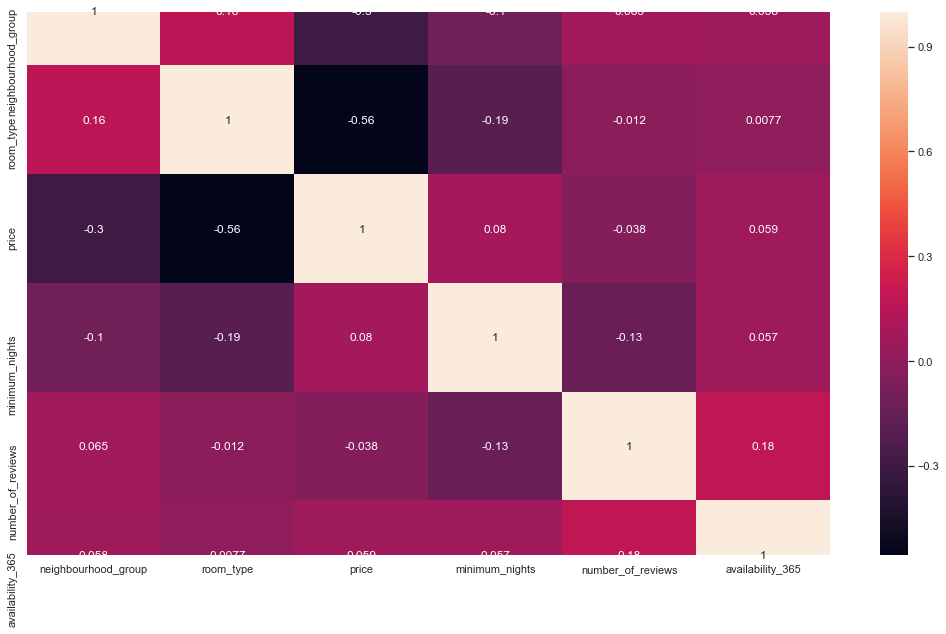

In [290]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
airbnb_en.columns